<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px; border-radius: 50px 50px;">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;">
        <b>Different types of cross validation in machine learning</b>
        <hr style="border-top: 2px solid #264653;">
    </h2>
</div>

Machine learning requires proper training to be effective. You can't just apply a model to training data and expect it to work well. To make sure the model is trained accurately and isn’t affected by random fluctuations in the data (noise), you should use cross-validation techniques. These techniques are statistical methods that help assess how well a machine learning model is likely to perform on new, unseen data.

## Types of cross-validation

1. Leave-one-out cross-validation
2. Leave-p-out cross-validation
3. K-fold cross-validation
4. Stratified k-fold cross-validation
5. Time series (rolling cross-validation)

## 1. Leave-one-out cross validation

In this technique, only 1 sample point is used as a validation set and the remaining n-1 samples are used in the training set. 

for example there are 1000 instances in your dataset. in each iteration, 1 instance will be used for the validation and the 999 instances remaining will be used as the training set. the process repeat itself until every instance from the dataset is used as a validation sample.

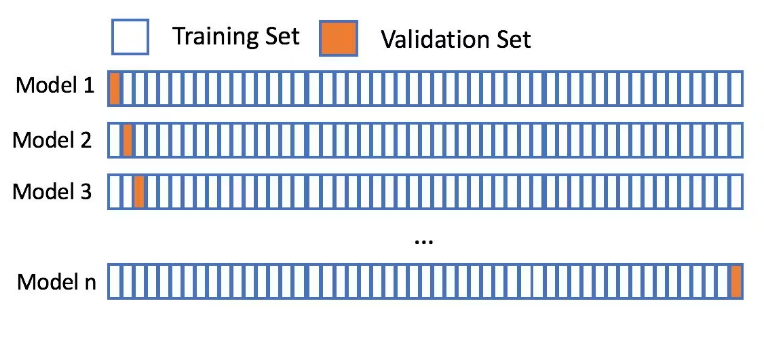

The leave-one-out cross-validation method is computationally expensive to perform and shouldn’t be used with very large datasets. The good news is that the technique is very simple and requires no configuration to specify. It also provides a reliable and unbiased estimate for your model performance.

In [5]:
# code 

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
# load the dataset 
iris_df = load_iris()
X = iris_df.data
Y = iris_df.target

leave_one_out = LeaveOneOut()

rfc = RandomForestClassifier(n_estimators=7, max_depth=5, n_jobs=-1)

score = cross_val_score(rfc, X, Y, cv=leave_one_out)

print(f"We have {len(X)} samples in our dataset")

print(f"after {len(score)} iteration the Cross Validation Scores: {score}")

print(f"CV Average is :{score.mean()}")


We have 150 samples in our dataset
after 150 iteration the Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
CV Average is :0.96


## 2. Leave-p-our cross validation

p samples are used as the validation set and n-p samples are used as the training part, The process is repeated until the entire dataset containing n samples gets divided on the validation set of p samples and the training set of n-p samples. This continues till all samples are used as a validation set.

The technique, which has a high computation time, produces good results. However, it’s not considered ideal for an imbalanced dataset and is deemed to be a computationally unfeasible method. This is because if the training set has all samples of one class, the model will not be able to properly generalize and will become biased to either of the classes.

In [9]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p = 1)
lpo.get_n_splits(X)
score = cross_val_score(rfc, X, Y, cv=lpo)

print(f"We have {len(X)} samples in our dataset")


print(f"after {len(score)} iteration the Cross Validation Scores: {score}")

print(f"CV Average is :{score.mean()}")

We have 150 samples in our dataset
after 150 iteration the Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
CV Average is :0.94


## 3. K-fold cross validation

In this technique, the whole dataset is partitioned in k parts of equal size and each partition is called a fold. It’s known as k-fold since there are k parts where k can be any integer - 3,4,5, etc.

One fold is used for validation and other K-1 folds are used for training the model. To use every fold as a validation set and other left-outs as a training set, this technique is repeated k times until each fold is used once.

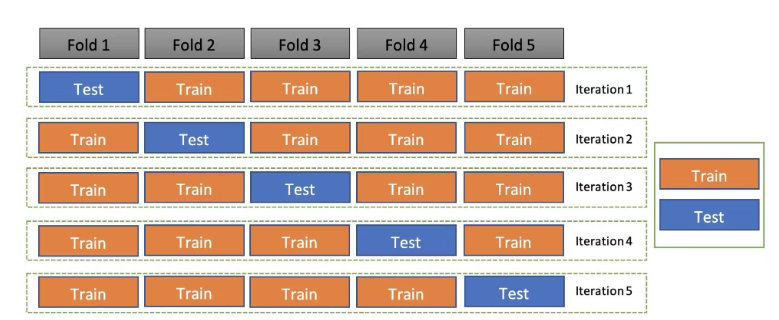

In [13]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=7)

score = cross_val_score(rfc, X, Y, cv=k_fold)

print(f"We have {len(X)} samples in our dataset")

print(f"after {len(score)} iteration the Cross Validation Scores: {score}")

print(f"CV Average is :{score.mean()}")

We have 150 samples in our dataset
after 7 iteration the Cross Validation Scores: [1.         1.         1.         0.80952381 0.95238095 0.95238095
 0.85714286]
CV Average is :0.9387755102040816


## 4. Stratified k-fold cross-validation

k-fold validation can’t be used for imbalanced datasets because data is split into k-folds with a uniform probability distribution. Not so with stratified k-fold, which is an enhanced version of the k-fold cross-validation technique. Although it too splits the dataset into k equal folds, each fold has the same ratio of instances of target variables that are in the complete dataset. This enables it to work perfectly for imbalanced datasets, but not for time-series data.

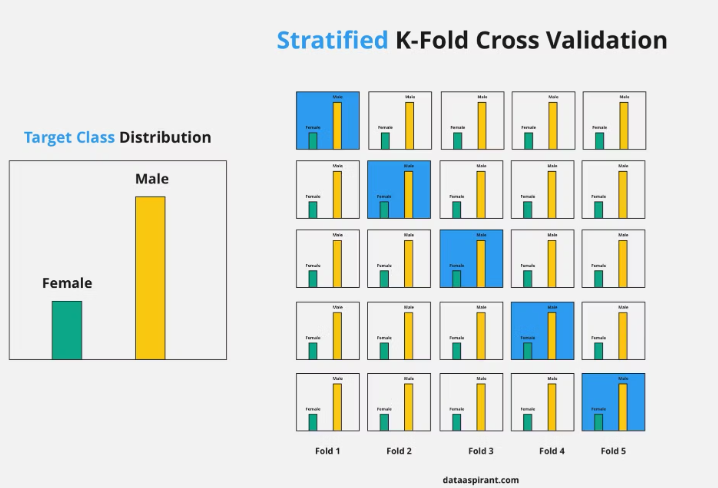


In the example above, the original dataset contains females that are a lot less than males, so this target variable distribution is imbalanced. In the stratified k-fold cross-validation technique, this ratio of instances of the target variable is maintained in all the folds.


In [14]:
from sklearn.model_selection import StratifiedKFold

st_kf = StratifiedKFold(n_splits=4)
score = cross_val_score(rfc, X, Y, cv=st_kf)

print(f"after {len(score)} iteration the Cross Validation Scores: {score}")

print(f"CV Average is :{score.mean()}")

after 4 iteration the Cross Validation Scores: [0.97368421 0.94736842 0.94594595 1.        ]
CV Average is :0.9667496443812233


## 5. Time series (rolling cross-validation / forward chaining method)
Before going into the details of the rolling cross-validation technique, it’s important to understand what time-series data is.

Time series is the type of data collected at different points in time. This kind of data allows one to understand what factors influence certain variables from period to period. Some examples of time series data are weather records, economic indicators, etc.

In the case of time series datasets, the cross-validation is not that trivial. You can’t choose data instances randomly and assign them the test set or the train set. Hence, this technique is used to perform cross-validation on time series data with time as the important factor.

Since the order of data is very important for time series-related problems, the dataset is split into training and validation sets according to time. Therefore, it’s also called the forward chaining method or rolling cross-validation.

To begin:
Start the training with a small subset of data. Perform forecasting for the later data points and check their accuracy. The forecasted data points are then included as part of the next training dataset and the next data points are forecasted. The process goes on.

In [16]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = np.array([
    [1, 2],
    [3, 4],
    [1, 2],
    [3, 4],
    [1, 2],
    [3, 4],
    [1, 1],
    [2, 2]
])

Y = np.array([1,2,3,4,5,6,7,8])

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

model = LinearRegression()

scores = []

for i, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    print(f"\nSplit {i}:")
    print(f"Train indices: {train_index}")
    print(f"Test indices: {test_index}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    
    print(f"R2 score: {r2:.4f}")
    
    scores.append(r2)

# Calculate the average score
avg_score = np.mean(scores)
print(f"\nAverage Score (MSE) across all splits: {avg_score:.4f}")

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Train 1 [0 1 2] Test: [3]
Train 2 [0 1 2 3] Test: [4]
Train 3 [0 1 2 3 4] Test: [5]
Train 4 [0 1 2 3 4 5] Test: [6]
Train 5 [0 1 2 3 4 5 6] Test: [7]
